In [62]:
# imports
from sklearn.cluster import KMeans
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [63]:
# linearly separable  data generator
class DataGenerator(object):

    def _generate_rand_xs(self, dimensions):
        return np.append(np.random.randint(0, 10, (dimensions-1, ))*np.random.choice([1, -1]), 1)

    def _get_data_points(self, data, count, dimensions, coefficients, number_of_datapoints, _class):
        for data_point in range(count):
            x_s = self._generate_rand_xs(dimensions)
            dot_product = np.dot(x_s, coefficients)
            if _class != 'positive':
                shifted_data = x_s[:-1] + np.random.randint(-number_of_datapoints, -2)
            else:
                shifted_data = x_s[:-1] + np.random.randint(2, number_of_datapoints)
            single_data = np.append(shifted_data, dot_product)
            data.append(single_data.tolist())
        return data

    def linearly_separable (self, number_of_datapoints, coefficients, dimensions = 2):

        if dimensions != len(coefficients):
            raise Exception('Dimensions and coefficient array should have same length.')

        positive_class_count = number_of_datapoints // 2
        negative_class_count = number_of_datapoints - positive_class_count

        #convert coefficient array to numpy
        coefficients = np.array(coefficients)
        data = self._get_data_points([], positive_class_count, dimensions, coefficients, number_of_datapoints, 'positive')
        return self._get_data_points(data, negative_class_count, dimensions, coefficients, number_of_datapoints, 'negative')

In [64]:
# generate 250 data points which are linearly separable by line y = 2x + 5
data_generator = DataGenerator()
dataset = np.array(data_generator.linearly_separable(250, [2, 5]))

In [65]:
kmeans = KMeans(n_clusters = 2)
kmeans.fit(dataset)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

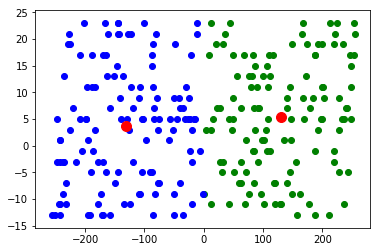

In [66]:
def get_xs(dataset, and_labels, label):
    x_s = []
    for a_single_data, and_a_label in zip(dataset, and_labels):
        if and_a_label == label:
            x_s.append(a_single_data[0])
    return x_s

def get_ys(dataset, and_labels, label):
    y_s = []
    for a_single_data, and_a_label in zip(dataset, and_labels):
        if and_a_label == label:
            y_s.append(a_single_data[1])
    return y_s

def get_centroid_xs(centroid_array):
    x_s = []
    for a_centroid in centroid_array:
        x_s.append(a_centroid[0])
    return x_s

def get_centroid_ys(centroid_array):
    y_s = []
    for a_centroid in centroid_array:
        y_s.append(a_centroid[1])
    return y_s

plt.scatter(get_xs(dataset, kmeans.labels_, 0), get_ys(dataset, kmeans.labels_, 0), color = 'g')
plt.scatter(get_xs(dataset, kmeans.labels_, 1), get_ys(dataset, kmeans.labels_, 1), color = 'b')

#plot centroids as red
for a_centroid in kmeans.cluster_centers_:
    plt.scatter(a_centroid[0], a_centroid[1], color = 'r', s = 100)
plt.show()